<a href="https://colab.research.google.com/github/musicjae/intro_to_python/blob/master/Pytorch/Pytorch_studying(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))


Saving pt1.png to pt1.png
User uploaded file "pt1.png" with length 80241 bytes


In [25]:
from IPython.display import Image

PYTORCH는 무엇인가?  

Python 기반의 과학 연산 패키지로 다음과 같은 두 집단을 대상으로 합니다:

- NumPy를 대체하면서 GPU를 이용한 연산이 필요한 경우

- 최대한의 유연성과 속도를 제공하는 딥러닝 연구 플랫폼이 필요한 경우

# 1. 텐서

In [11]:
import torch

test1 = torch.empty(5,3)
test2 = torch.rand(5,3)
test3 = torch.tensor([2,1]) # data --> tensor
print('\n\n1',test1,'\n\n2', test2,'\n\n3', test3)

x = test2.new_ones(5, 3, dtype=torch.double)  # new_* 메소드는 크기를 받습니다
print('\n\n4',x)

print('\n\n5',test1+test2)



1 tensor([[1.8054e-35, 0.0000e+00, 1.6675e-43],
        [5.6052e-44, 1.6816e-43, 6.1657e-44],
        [4.4842e-44, 1.6956e-43, 6.1657e-44],
        [4.4842e-44, 1.7096e-43, 5.7453e-44],
        [7.3063e-01, 8.1877e-01, 4.2083e-01]]) 

2 tensor([[0.6857, 0.4001, 0.3928],
        [0.5153, 0.3877, 0.9543],
        [0.5612, 0.0323, 0.2096],
        [0.3465, 0.2714, 0.2285],
        [0.2157, 0.8310, 0.0175]]) 

3 tensor([2, 1])


4 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


5 tensor([[0.6857, 0.4001, 0.3928],
        [0.5153, 0.3877, 0.9543],
        [0.5612, 0.0323, 0.2096],
        [0.3465, 0.2714, 0.2285],
        [0.9464, 1.6497, 0.4384]])


## 1.2 크기 변경

In [17]:
tor = torch.rand(5,3)
print(tor)

tor = tor.view(3,5) # resize
print(tor)

tensor([[0.9183, 0.0772, 0.9426],
        [0.6906, 0.8982, 0.5494],
        [0.1190, 0.1512, 0.7501],
        [0.4374, 0.9671, 0.2858],
        [0.5406, 0.5627, 0.9293]])
tensor([[0.9183, 0.0772, 0.9426, 0.6906, 0.8982],
        [0.5494, 0.1190, 0.1512, 0.7501, 0.4374],
        [0.9671, 0.2858, 0.5406, 0.5627, 0.9293]])


## 1.3 텐서값을 하나의 수로 뽑아내기 item

In [24]:
tor = torch.rand(1)
print(tor)  

torr = tor.item()
print(torr)
  


tensor([0.1570])
0.15695178508758545


## 1.4 tensor --> numpy

In [25]:
tor = torch.rand(1)
print(tor)  

tor2 = tor.numpy()
print(tor2)

tensor([0.3287])
[0.32868278]


## 1.5 numpy --> tensor

In [29]:
import numpy as np
import torch

num = np.ones(5)
print(num,'\n')
tor3 = torch.from_numpy(num)
print(tor3)

[1. 1. 1. 1. 1.] 

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


# 2. 예제로 배우는 파이토치

## 2.1 넘파이 사용 시

In [53]:
# 넘파이

import numpy as np
import time

# N은 배치 크기이며, D_in은 입력의 차원입니다;
# H는 은닉층의 차원이며, D_out은 출력 차원입니다.
N, D_in, H, D_out = 64, 1000, 100, 10

# 무작위의 입력과 출력 데이터를 생성합니다.
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# 무작위로 가중치를 초기화합니다.
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
start = time.time()
for t in range(500):
    # 순전파 단계: 예측값 y를 계산합니다.
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # 손실(loss)을 계산하고 출력합니다.
    loss = np.square(y_pred - y).sum()
    if (t+1) % 50 == 0:
        print('Epoch:', '%04d' % (t + 1), 'cost =', '{:.6f}'.format(loss))

    # 손실에 따른 w1, w2의 변화도를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # 가중치를 갱신합니다.
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
end= time.time()
print('\n\n','>>>>>> 소요 시간: ',end-start,'sec')

Epoch: 0050 cost = 10074.721998
Epoch: 0100 cost = 297.387863
Epoch: 0150 cost = 16.145471
Epoch: 0200 cost = 1.197034
Epoch: 0250 cost = 0.107648
Epoch: 0300 cost = 0.010891
Epoch: 0350 cost = 0.001180
Epoch: 0400 cost = 0.000133
Epoch: 0450 cost = 0.000015
Epoch: 0500 cost = 0.000002


 >>>>>> 소요 시간:  1.0614979267120361 sec


## 2.2 파이토치 사용 시

In [54]:
import torch
import time


dtype = torch.float
device = torch.device("cpu")
device = torch.device("cuda:0") # GPU에서 실행

N, D_in, H, D_out = 64, 1000, 100, 10 # N은 배치 크기이며, D_in은 입력의 차원입니다; # H는 은닉층의 차원이며, D_out은 출력 차원입니다.

x = torch.randn(N,D_in)
y=torch.randn(N,D_out)

w1 = torch.randn(D_in, H)
w2 = torch.randn(H,D_out)

learning_rate = 1e-6
start = time.time()


for t in range(500):

    # forward 

    h=x.mm(w1)
    h_relu = h.clamp(min=0) # relu
    y_pred = h_relu.mm(w2)

    # loss

    loss = (y_pred - y).pow(2).sum().item()
    if (t+1)%20==0:

        print("epoch:", '%.04d' % (t+1), 'cost: {:.06f}'.format(loss))

    # backward

    grad_y_pred = 2.0*(y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h)

    # update by sgd

    w1 -= learning_rate*grad_w1
    w2 -= learning_rate*grad_w2
end = time.time()
print('\n\n >>>>> 소요 시간: ',end-start,'sec')

epoch: 0020 cost: 279092.062500
epoch: 0040 cost: 39204.929688
epoch: 0060 cost: 9579.550781
epoch: 0080 cost: 2985.496582
epoch: 0100 cost: 1051.449097
epoch: 0120 cost: 394.996124
epoch: 0140 cost: 154.387115
epoch: 0160 cost: 61.952080
epoch: 0180 cost: 25.351934
epoch: 0200 cost: 10.541975
epoch: 0220 cost: 4.451124
epoch: 0240 cost: 1.902354
epoch: 0260 cost: 0.821489
epoch: 0280 cost: 0.357924
epoch: 0300 cost: 0.157300
epoch: 0320 cost: 0.069628
epoch: 0340 cost: 0.031095
epoch: 0360 cost: 0.014058
epoch: 0380 cost: 0.006507
epoch: 0400 cost: 0.003128
epoch: 0420 cost: 0.001597
epoch: 0440 cost: 0.000878
epoch: 0460 cost: 0.000518
epoch: 0480 cost: 0.000326
epoch: 0500 cost: 0.000218


 >>>>> 소요 시간:  0.5359079837799072 sec


## ****이 비교에서는 파이토치가 넘파이 보다 약 2 배 더 빠르다!

# 3. 자동 미분 Autograd

"다행히도, 자동 미분 을 사용하여 신경망에서 역전파 단계의 연산을 자동화할 수 있습니다. PyTorch의 autograd 패키지는 정확히 이런 기능을 제공합니다. Autograd를 사용할 때, *신경망의 순전파 단계는 연산 그래프 를 정의하게 됩니다*; 이 그래프의 노드(node)는 Tensor, 엣지(edge)는 입력 Tensor로부터 출력 Tensor를 만들어내는 함수가 됩니다. 이 그래프를 통해 역전파를 하게 되면 변화도를 쉽게 계산할 수 있습니다.

이는 복잡하게 들리지만, 실제로 사용하는 것은 매우 간단합니다. 각 Tensor는 연산 그래프에서 노드로 표현됩니다. 만약 x 가 x.requires_grad=True 인 Tensor면 x.grad 는 어떤 스칼라 값에 대한 x 의 변화도를 갖는 또 다른 Tensor입니다."
https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html

(1) torch.autograd.Function의 서브클래스 정의  
(2) forward, backward 함수 구현  
(3) 인스턴스 생성

In [22]:
import torch
import time

class MyReLU(torch.autograd.Function):

    @staticmethod
    def forward(ctx, input): # ctx는 컨텍스트 객체(context object)로 역전파 연산을 위한 정보 저장에 사용합니다. ctx.save_for_backward method를 사용하여 역전파 단계에서 사용할 어떠한 객체도 저장(cache)해 둘 수 있습니다.
        
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    def backward(ctx, grad_output):

        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

dtype = torch.float
device = torch.device("cpu")

# N : batch size
# D_in: dimentionality of input
# H: hidden layers #
# D_out

N, D_in, H, D_out = 64, 1000, 100,10

#입력, 출력 저장하려고 무작위 값 생성
x = torch.randn(N, D_in, device = device, dtype = dtype)
y = torch.randn(N, D_out, device = device, dtype = dtype)

w1 = torch.randn(D_in, H, device = device, dtype = dtype, requires_grad = True)
w2 = torch.randn(H, D_out, device = device, dtype = dtype, requires_grad = True)

learning_rate = 1e-6
start = time.time()
for t in range(500):

    relu = MyReLU.apply # 사용자 정의 Function을 적용하기 위해 --.apply 메소드 사용.

    # 순전파
    y_pred = relu(x.mm(w1)).mm(w2)

    # loss는 (1,) 형태의 텐서니까 loss.item()를 통해 그 안의 수를 빼낸다
    loss = (y_pred - y).pow(2).sum()

    if (t+1) % 50 == 0:

        print('epoch: ',t+1, 'cost: ',loss.item())

    # autograd: 이것은 requires_grad=True 를 갖는 모든 텐서에 대한 loss_grad를 계산.
    #  이후 w1.grad와 w2.grad는 w1과 w2 각각에 대한 손실의 변화도를 갖는 Tensor가 됩니다
    loss.backward()

    #  수동으로 가중치 갱신

    with torch.no_grad(): # 이것으로 감싸는 이유는 가중치들이 requires_grad = True 지만, autograd에서는 이것을 추적 x

        w1 -= learning_rate*w1.grad
        w2 -= learning_rate*w2.grad

        # 가중치 갱신 이후 ==> 수동으로 변화도를 0으로 초기화

        w1.grad.zero_()
        w2.grad.zero_()

end = time.time()
print('\n\n >>>>> 소요 시간: ',end-start,'sec')


epoch:  50 cost:  17388.783203125
epoch:  100 cost:  786.827392578125
epoch:  150 cost:  57.27821731567383
epoch:  200 cost:  5.198742389678955
epoch:  250 cost:  0.5696195363998413
epoch:  300 cost:  0.07543689012527466
epoch:  350 cost:  0.012183597311377525
epoch:  400 cost:  0.0024957151617854834
epoch:  450 cost:  0.0007140944362618029
epoch:  500 cost:  0.00027196871815249324


 >>>>> 소요 시간:  0.5701742172241211 sec


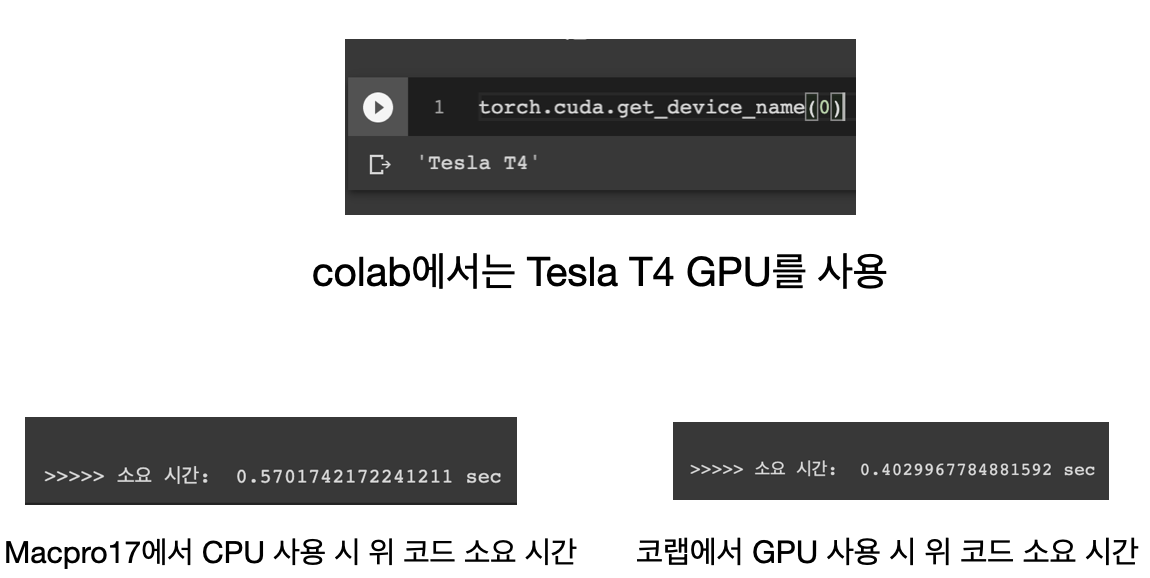

In [26]:
Image('pt1.png',width=800)

## 4.nn모듈  
  
규모가 큰 경우에 autograd는 낮은 수준일 수 있다.  
신경망 만들 때, 연산을 여러 층에 arrange 하는 것으로 생각한다. 이 중 일부는 학습 도중에 최적화가 될 learnable param을 갖고 있다.  
  
pytorch의 nn패키지는 연산 그래프를 higher-level abstraction하게 해준다.

In [38]:
import torch
import time

device = torch.device("cuda:0")
N,D_in,H,D_out = 64, 1000, 100, 10

x = torch.randn(N,D_in)
y = torch.randn(N,D_out)

# nn을 사용하여 모델을 순차적 계층 sequence of layers으로 정의
# nn.Sequential을 사용 --> 모듈을 순차적으로 적용 후 출력.
# nn.Linear 사용 --> 입력에서 출력 계산 & 내부 텐서에 w, b 저장

model = torch.nn.Sequential(
    torch.nn.Linear(D_in,H),
    torch.nn.ReLU(),
    torch.nn.Linear(H,H),
    torch.nn.ReLU(),
    torch.nn.Linear(H,D_out)
)

# nn 패키지에는 loss 함수도 포함.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate=1e-4

start = time.time()
for t in range(500):

    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    if (t+1) % 100 ==0:

        print('epoch: ',t+1,'cost: ',loss.item())

    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():

            param -= learning_rate*param.grad

end = time.time()
print('\n\n >>>>> 소요 시간: ',end-start,'sec')

epoch:  100 cost:  61.023338317871094
epoch:  200 cost:  2.1354663372039795
epoch:  300 cost:  0.1565343737602234
epoch:  400 cost:  0.021196234971284866
epoch:  500 cost:  0.004153297748416662


 >>>>> 소요 시간:  0.6285409927368164 sec


## 5. Optim 모듈  
  
 AdaGrad, RMSProp, Adam 등과 같은 좀 더 정교한 Optimizer를 간편히 사용해보자.  
   
 optim 패키지는 최적화 알고리즘에 대한 아이디어를 추상화하고 일반적으로 사용하는 최적화 알고리즘의 구현체(implementation)를 제공합니다.

In [47]:
import torch
import time

device = torch.device("cuda:0")
N,D_in,H,D_out = 64, 1000, 100, 10

x = torch.randn(N,D_in)
y = torch.randn(N,D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in,H),
    torch.nn.ReLU(),
    torch.nn.Linear(H,D_out),
)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate=1e-4

# 최적화 도구 사용
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

start = time.time()
for t in range(500):

    y_pred = model(x)

    loss = loss_fn(y_pred, y)

    if (t+1)%100 == 0:

        print('epoch: ',t+1,'cost: ',loss.item())

        # 역전파 전에 갱신할 변수에 대한 모든 변화도를 0으로 조정해라.
        # 왜냐면 역전파 호출할 때 마다 변화도가 누적되기 때문이다.

    optimizer.zero_grad()
    
    loss.backward()

    optimizer.step() #update


end = time.time()
print('\n\n >>>>> 소요 시간: ',end-start,'sec')

epoch:  100 cost:  40.22212600708008
epoch:  200 cost:  0.5011070370674133
epoch:  300 cost:  0.0019243512069806457
epoch:  400 cost:  2.478755959600676e-06
epoch:  500 cost:  6.590921697302576e-10


 >>>>> 소요 시간:  0.6831636428833008 sec


## 6. 사용자 정의 nn.Module  
  
(1) 서브클래스로 새 모듈 정의  
(2) 입력 텐서 take 이후에 다른 모듈 or 자동미분으로 출력 텐서를 만드는 forward 정의  


In [49]:
import torch
import time


class TwoLayerNet(torch.nn.Module):

    def __init__(self,D_in,H, D_out):

        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in,H)
        self.linear2 = torch.nn.Linear(H,D_out)
         
    def forward(self, x):

        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)

        return y_pred


N, D_in, H, D_out = 64, 1000, 100, 10

# 입력과 출력을 저장하기 위해 무작위 값을 갖는 Tensor를 생성합니다.
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 앞에서 정의한 클래스를 생성하여 모델을 구성합니다.
model = TwoLayerNet(D_in, H, D_out)

# (1) 손실 함수 만들기

criterion = torch.nn.MSELoss(reduction='sum')

# (2) optim 만들기

optimizer = torch.optim.SGD(model.parameters(),lr=1e-4)

start = time.time()
for t in range(500):

    y_pred = model(x)

    loss = criterion(y_pred, y)

    if (t+1) % 100 ==0:

        print('epoch: ',t+1,'cost: ',loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


end = time.time()
print('\n\n >>>>> 소요 시간: ',end-start,'sec')

epoch:  100 cost:  2.812735080718994
epoch:  200 cost:  0.07182228565216064
epoch:  300 cost:  0.004011179786175489
epoch:  400 cost:  0.0002829668519552797
epoch:  500 cost:  2.172885615436826e-05


 >>>>> 소요 시간:  0.4449307918548584 sec


## 7. Control Flow + Weight Sharing

"각 순전파 단계에서 많은 은닉 계층을 갖는 완전히 연결(fully-connected)된 ReLU 신경망이 무작위로 0 ~ 3 사이의 숫자를 선택하고, 가장 안쪽(innermost)의 은닉층들을 계산하기 위해 동일한 가중치를 여러 번 재사용합니다.

이 모델에서는 일반적인 Python 제어 흐름을 사용하여 반복(loop)을 구현할 수 있으며, 순전파 단계를 정의할 때 단지 동일한 Module을 여러번 재사용함으로써 내부(innermost) 계층들 간의 가중치 공유를 구현할 수 있습니다."

In [50]:
import random
import torch


class DynamicNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        생성자에서 순전파 단계에서 사용할 3개의 nn.Linear 인스턴스를 생성합니다.
        """
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.middle_linear = torch.nn.Linear(H, H)
        self.output_linear = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        모델의 순전파 단계에서, 무작위로 0, 1, 2 또는 3 중에 하나를 선택하고
        은닉층을 계산하기 위해 "여러번 사용한 middle_linear Module을 재사용"합니다.

        각 순전파 단계는 동적 연산 그래프를 구성하기 때문에, 모델의 순전파 단계를
        정의할 때 반복문이나 조건문과 같은 일반적인 Python 제어 흐름 연산자를 사용할
        수 있습니다.

        여기에서 연산 그래프를 정의할 때 동일 Module을 여러번 재사용하는 것이
        완벽히 안전하다는 것을 알 수 있습니다. 이것이 각 Module을 한 번씩만 사용할
        수 있었던 Lua Torch보다 크게 개선된 부분입니다.
        """
        h_relu = self.input_linear(x).clamp(min=0)
        for _ in range(random.randint(0, 3)):
            h_relu = self.middle_linear(h_relu).clamp(min=0)
        y_pred = self.output_linear(h_relu)
        return y_pred


# N은 배치 크기이며, D_in은 입력의 차원입니다;
# H는 은닉층의 차원이며, D_out은 출력 차원입니다.
N, D_in, H, D_out = 64, 1000, 100, 10

# 입력과 출력을 저장하기 위해 무작위 값을 갖는 Tensor를 생성합니다.
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 앞서 정의한 클래스를 생성(instantiating)하여 모델을 구성합니다.
model = DynamicNet(D_in, H, D_out)

# 손실함수와 Optimizer를 만듭니다. 이 이상한 모델을 순수한 확률적 경사 하강법
# (stochastic gradient decent)으로 학습하는 것은 어려우므로, 모멘텀(momentum)을
# 사용합니다.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
for t in range(500):
    # 순전파 단계: 모델에 x를 전달하여 예상되는 y 값을 계산합니다.
    y_pred = model(x)

    # 손실을 계산하고 출력합니다.
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 변화도를 0으로 만들고, 역전파 단계를 수행하고, 가중치를 갱신합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

99 35.73106002807617
199 1.0500552654266357
299 0.5155643224716187
399 1.7770872116088867
499 0.8140354752540588


# References. 
  
[1] [예제로 배우는 파이토치](https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html)